<a href="https://colab.research.google.com/github/FintechClown/Quantitative-Methods-Econometrics-for-Finance/blob/main/%E5%85%AD%E5%A4%A7%E6%AA%A2%E5%AE%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 由NYSE、TWSE資料學習六大檢定

檢查套件版本

In [2]:
!pip show scipy

Name: scipy
Version: 1.4.1
Summary: SciPy: Scientific Library for Python
Home-page: https://www.scipy.org
Author: None
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy
Required-by: yellowbrick, xgboost, umap-learn, Theano, statsmodels, sklearn-pandas, seaborn, scs, scikit-learn, scikit-image, resampy, qdldl, pynndescent, pymc3, plotnine, osqp, mlxtend, missingno, matplotlib-venn, lucid, lightgbm, librosa, Keras, jaxlib, imgaug, imbalanced-learn, hyperopt, gym, gensim, fastai, fancyimpute, fa2, ecos, cvxpy, albumentations


In [3]:
!pip install scipy -U

     |████████████████████████████████| 27.4MB 140kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


## 匯入資料

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
from scipy import stats

In [7]:
nyse_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/NYSE.csv')
nyse_df.describe()

,P/E ratio
count,28.000000
mean,23.248214
std,9.493624
min,8.300000
25%,14.870000
50%,22.920000
75%,28.022500
max,49.780000


In [8]:
twse_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/TWSE.csv')
twse_df.describe()

,P/E ratio
count,50.000000
mean,16.947400
std,17.447043
min,3.330000
25%,10.395000
50%,12.535000
75%,18.255000
max,127.500000


In [9]:
df = pd.concat([twse_df,nyse_df],axis=1)
df

,P/E ratio,P/E ratio
0,15.13,27.96
1,13.48,22.90
2,23.74,8.30
3,22.40,49.78
4,15.45,24.68
5,28.03,14.55
6,14.14,28.22
7,34.98,28.21
8,14.18,34.71
9,12.58,12.99


## 範例一: 單母體平均數檢定(雙尾)

### 假設檢定五大步驟

#### 步驟一: 設立虛無假說
$ H_0:\mu = 10$

$ H_1:\mu \neq 10$

$\alpha = 0.05$

#### 步驟二: 選定檢定統計量
$t = \frac{\bar{x}-10}{\frac{S}{\sqrt n}}\sim t_{(49)} $ 

#### 步驟三: 設立拒絕域
$ R = \{ t\mid|t|>t_{0.025}\}$

#### 步驟四: 計算

In [10]:
stats.ttest_1samp(twse_df,10,alternative='two-sided')

Ttest_1sampResult(statistic=array([2.81569405]), pvalue=array([0.00699273]))

#### 步驟五: 結論

$p\space value = 0.007$

$\alpha = 0.05$

$p\space value < \frac{\alpha}{2}$

Reject null hypothesis

$\rightarrow$在0.05的顯著水準下，TWSE的本益比平均值不為10

## 範例二: 單母體變異數檢定(雙尾)

### 假設檢定五大步驟

#### 步驟一: 設立虛無假說


$H_0:\sigma^2 = 300$

$H_1:\sigma^2 \neq 300$

$\alpha = 0.05$

####步驟二: 選定檢定統計量
$\chi^2 = (n-1)\frac{S^2}{\sigma^2} \sim \chi^2_{(n-1)}$

#### 步驟三: 設立拒絕域
$R = \{ \chi^2 \mid \chi^2 < \chi^2_{0.975} \space or \space \chi^2 > \chi^2_{0.025} \}$

#### 步驟四: 計算

In [11]:
var = np.var(twse_df,ddof=1)
var

P/E ratio    304.399326
dtype: float64

In [12]:
chi_square = (50-1)*var/300
chi_square

P/E ratio    49.718557
dtype: float64

In [13]:
stats.chi2.cdf(x=chi_square,df = 49)

array([0.55549626])

#### 步驟五: 結論
$p\space value>\frac{\alpha}{2}$

Do not reject null hypothesis

$\rightarrow$在0.05的顯著水準下，TWSE的變異數為300

## 範例三: 單母體比例檢定(右尾)

###假設檢定五大步驟

#### 步驟一: 設立虛無假說
假設本益比大於20的比例大於0.6

$H_0:p\leq0.6$

$H_1:p>0.6$

$\alpha = 0.05$

####步驟二: 選定檢定統計量
$Z = \frac{\hat{p}-p_0}{\sigma_\hat{p}}$

$\sigma_\hat{p} = \sqrt{\frac{p_0q_0}{n}}$

#### 步驟三: 設立拒絕域
$R = \{Z\mid Z>Z_{0.05} \}$

####步驟四: 計算

In [14]:
p = 0.6
q = 1-p
sigma_ph = np.sqrt(p*q/twse_df.size)
p,q,sigma_ph

(0.6, 0.4, 0.06928203230275509)

In [15]:
twse_df[twse_df['P/E ratio']>20].size

11

In [16]:
z= ((11/50)-p)/sigma_ph
z

-5.484827557301445

#### 步驟五: 結論
在顯著水準$\alpha = 0.05$下，不拒絕虛無假說

本益比大於20的比例$\leq$0.6



##範例四: 雙母體平均值檢定(雙尾)

### 假設檢定五大步驟

#### 步驟一:設立虛無假說
假設NYSE的本益比跟TWSE的本益比平均值有差異

$H_0:\mu_1 = \mu_2$

$H_0:\mu_1 \neq \mu_2$

$\alpha = 0.05$

####步驟二: 選定檢定統計量
$t = \frac{\bar{x_1}-\bar{x_2}}{\sqrt{ S_p^2(\frac{1}{n_1}+\frac{1}{n_2})}} \sim t_{(n_1+n_2-2)}$

####步驟三: 設立拒絕域
$R = \{ |t|\mid t>t_{0.025} \}$

####步驟四: 計算

In [17]:
stats.ttest_ind(nyse_df,twse_df,equal_var= True,alternative='two-sided')

Ttest_indResult(statistic=array([1.76677961]), pvalue=array([0.0812801]))

####步驟五: 結論
在顯著水準$\alpha = 0.05$下，不拒絕虛無假說
NYSE本益比跟TWSE本益比平均數無異

##範例五: 雙母體變異數檢定

###假設檢定五大步驟

####步驟一: 設立虛無假說
$H_0:\sigma^2_1 = \sigma^2_2$

$H_1:\sigma^2_1 \neq \sigma^2_2$

$\alpha = 0.05$

####步驟二: 選定檢定統計量
$F = \frac{\sigma^2_1}{\sigma^2_2}\sim F_{(n_1-1,n_2-1)} $

####步驟三: 設立拒絕域
$R=\{ F \mid F<F_{0.975} \space or \space F>F_{0.025}\}$

####步驟四: 計算

CDF:用統計量推P-value

PPF:用p-value推統計量

In [18]:
fc_l = stats.f.ppf(0.025,twse_df.size-1,nyse_df.size-1)
fc_r = stats.f.ppf(0.975,twse_df.size-1,nyse_df.size-1)
fc_l,fc_r #臨界值

(0.5258559428664646, 2.0325903323903156)

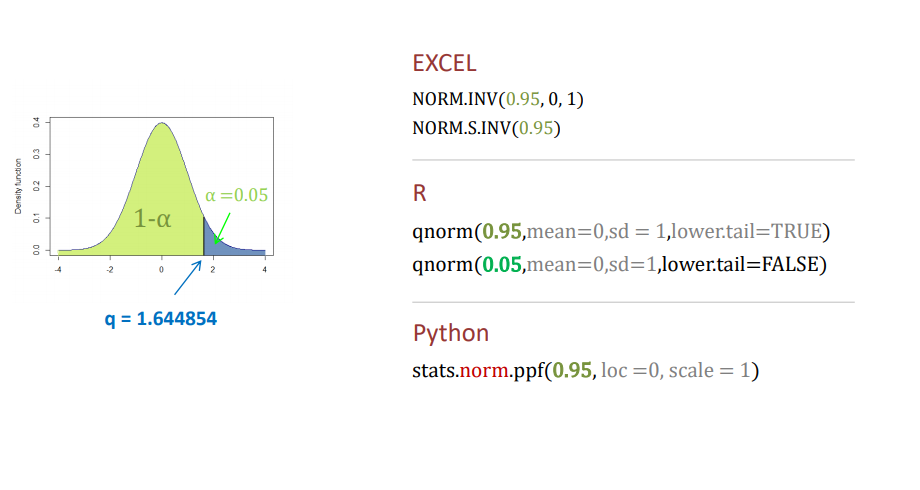

source: http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/en_Tanagra_Calcul_P_Value.pdf

In [19]:
twse_var = np.var(twse_df,ddof=1)
nyse_var = np.var(nyse_df,ddof=1)
twse_var,nyse_var

(P/E ratio    304.399326
 dtype: float64, P/E ratio    90.128897
 dtype: float64)

In [20]:
f = twse_var/nyse_var
f

P/E ratio    3.377378
dtype: float64

####步驟五: 結論
在$\alpha = 0.05$顯著水準下，拒絕虛無假說

twse的本益比變異數與nyse的本益比變異數有顯著差異

##範例六:雙母體比例檢定(右尾)

###假設檢定五大步驟
檢驗TWSE中本益比大於20的比例是否大於NYSE?

In [21]:
a = 20

####步驟一: 設立虛無假說
$H_0:p_1 \leq p_2$

$H_1:p_1 > p_2$

$\alpha = 0.05$

####步驟二: 選定檢定統計量
$Z = \frac{(\hat{p_1}-\hat{p_2})-(p_1-p_2)}{S_{\hat{p_1}-\hat{p_2}}} \sim Z$

####步驟三: 設立拒絕域
$R = \{Z\mid Z>Z_{0.05}\}$

####步驟四:計算

In [22]:
n1 = twse_df.size
n2 = nyse_df.size

In [23]:
twse_df[twse_df['P/E ratio']>a].size

11

In [24]:
nyse_df[nyse_df['P/E ratio']>a].size

19

In [25]:
p1_hat = twse_df[twse_df['P/E ratio']>a].size/n1
p2_hat = nyse_df[nyse_df['P/E ratio']>a].size/n2
p1_hat,p2_hat

(0.22, 0.6785714285714286)

In [26]:
p_hat = (twse_df[twse_df['P/E ratio']>a].size+nyse_df[nyse_df['P/E ratio']>a].size)/(n1+n2)
p_hat #組合比例

0.38461538461538464

$\hat{p}=\frac{n1\times\hat{p1}+n2\times\hat{p2}}{n1+n2}=\frac{x_1+x_2}{n_1+n_2
}$

In [27]:
sigma_p_hat= np.sqrt(p_hat*(1-p_hat)*((1/n1)+(1/n2)))
sigma_p_hat

0.11483385035264292

In [28]:
zc = stats.norm.ppf(0.95,0,1)
zc

1.6448536269514722

In [29]:
z = ((p1_hat-p2_hat)-0)/sigma_p_hat
z

-3.9933471460131575

In [30]:
1-stats.norm.cdf((p1_hat-p2_hat),0,sigma_p_hat) 

0.9999674264593504

norm.cdf(x,x.mean(),x.std())

The location (loc) keyword specifies the mean. 

The scale (scale) keyword specifies the standard deviation.

####步驟五: 結論

$Z < Z_c$ 

do not reject null hypothesis

在$\alpha = 0.05$顯著水準下，不拒絕虛無假說

TWSE中本益比大於30的比例沒有大於NYSE
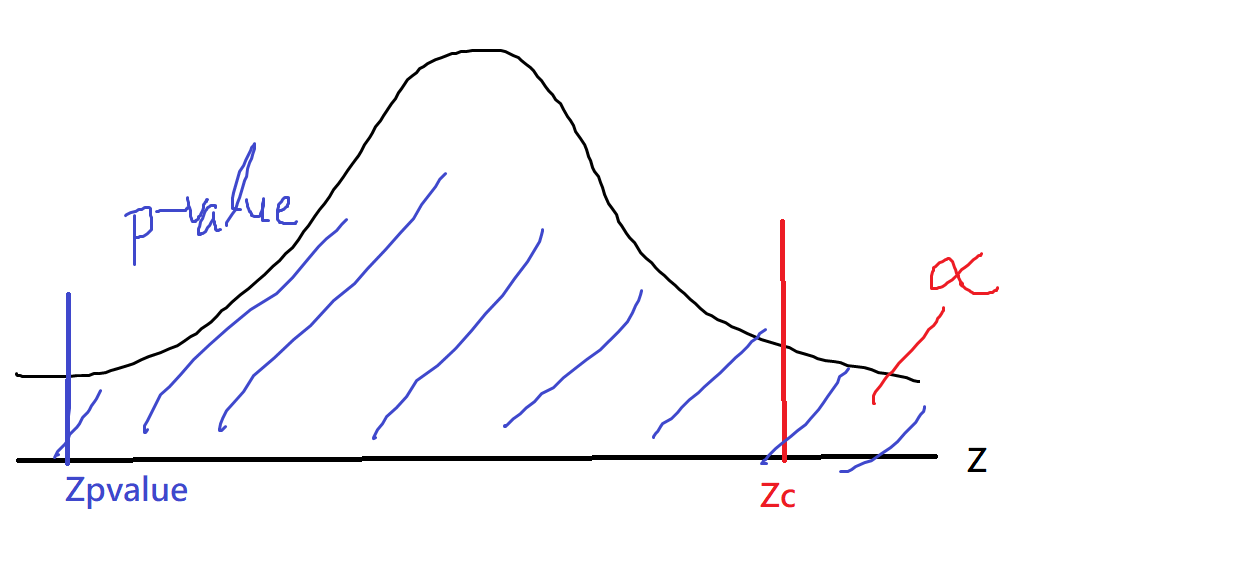

